In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range = 10,
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)


Found 3815 images belonging to 4 classes.


In [78]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_healthy']

In [41]:
train_generator.class_indices

{'Tomato_Early_blight': 0,
 'Tomato_Late_blight': 1,
 'Tomato_Leaf_Mold': 2,
 'Tomato_healthy': 3}

In [42]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5836686  0.57582545 0.5954333 ]
  [0.48940226 0.48155913 0.50116694]
  [0.41669813 0.408855   0.42846283]
  ...
  [0.4547029  0.44685978 0.46646762]
  [0.46512112 0.45727798 0.47688583]
  [0.47553933 0.4676962  0.48730403]]

 [[0.5863571  0.578514   0.5981218 ]
  [0.50586975 0.4980266  0.51763445]
  [0.40695208 0.39910895 0.4187168 ]
  ...
  [0.54383165 0.5359885  0.55559635]
  [0.5418152  0.5339721  0.5535799 ]
  [0.5397988  0.53195566 0.5515635 ]]

 [[0.5890457  0.58120257 0.6008104 ]
  [0.5223372  0.51449406 0.5341019 ]
  [0.39720598 0.38936284 0.40897068]
  ...
  [0.53824383 0.5304007  0.55000854]
  [0.5432849  0.53544176 0.5550496 ]
  [0.54832596 0.5404828  0.56009066]]

 ...

 [[0.38431376 0.38431376 0.3921569 ]
  [0.38431376 0.38431376 0.3921569 ]
  [0.38431376 0.38431376 0.3921569 ]
  ...
  [0.3706576  0.36673602 0.38634387]
  [0.34942138 0.3454998  0.36510766]
  [0.36639538 0.36247382 0.38208166]]

 [[0.3676204  0.3676204  0.37546358]
  [0.36526793 0.36526793 0.37311107]


In [43]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 544 images belonging to 4 classes.


In [44]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1093 images belonging to 4 classes.


In [51]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [54]:
3815/32

119.21875

In [55]:
history = model.fit(
    train_generator,
    steps_per_epoch=119,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=25,
)

Epoch 1/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 102s 821ms/step - accuracy: 0.3873 - loss: 1.2996 - val_accuracy: 0.5781 - val_loss: 0.8956
Epoch 2/25
  1/119 ━━━━━━━━━━━━━━━━━━━━ 58s 494ms/step - accuracy: 0.4375 - loss: 1.0951

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4375 - loss: 1.0951 - val_accuracy: 0.6094 - val_loss: 0.9083
Epoch 3/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 79s 645ms/step - accuracy: 0.6783 - loss: 0.7985 - val_accuracy: 0.6687 - val_loss: 0.7447
Epoch 4/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6875 - loss: 0.9745 - val_accuracy: 0.7292 - val_loss: 0.6552
Epoch 5/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 81s 669ms/step - accuracy: 0.7535 - loss: 0.5954 - val_accuracy: 0.7500 - val_loss: 0.6097
Epoch 6/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6875 - loss: 0.7766 - val_accuracy: 0.7125 - val_loss: 0.6221
Epoch 7/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 84s 688ms/step - accuracy: 0.7881 - loss: 0.5428 - val_accuracy: 0.7344 - val_loss: 0.6722
Epoch 8/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7812 - loss: 0.6841 - val_accuracy: 0.7552 - val_loss: 0.5751
Epoch 9/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 81s 661ms/step - accuracy: 0.7782 - loss: 0.5215 - val_accurac

In [56]:
scores = model.evaluate(test_generator)

35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 683ms/step - accuracy: 0.9156 - loss: 0.2827


In [59]:
scores

[0.30762043595314026, 0.9204025864601135]

In [60]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.2090051174163818,
 1.0951412916183472,
 0.7675798535346985,
 0.9744609594345093,
 0.5711864233016968]

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [62]:
val_acc

[0.578125,
 0.609375,
 0.668749988079071,
 0.7291666865348816,
 0.75,
 0.7124999761581421,
 0.734375,
 0.7552083134651184,
 0.7749999761581421,
 0.75,
 0.796875,
 0.762499988079071,
 0.8697916865348816,
 0.8697916865348816,
 0.737500011920929,
 0.7291666865348816,
 0.9270833134651184,
 0.8812500238418579,
 0.8958333134651184,
 0.90625,
 0.9375,
 0.9010416865348816,
 0.9270833134651184,
 0.90625,
 0.8645833134651184]

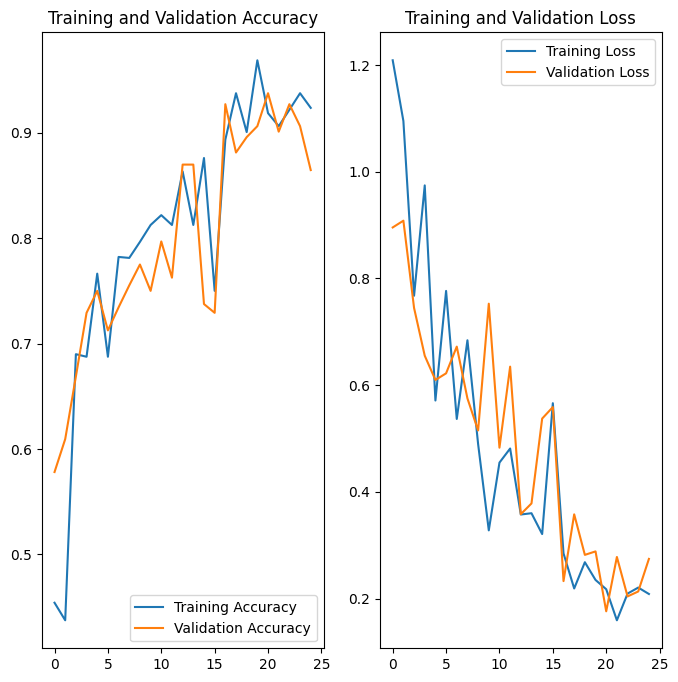

In [68]:

# Extract accuracy and loss data from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Ensure the range matches the number of epochs

plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


first image to predict
actual label: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
predicted label: Tomato_Late_blight


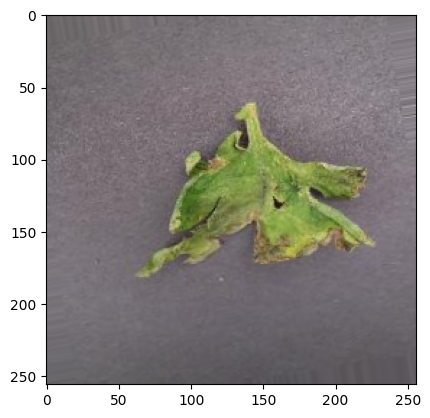

In [83]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [84]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


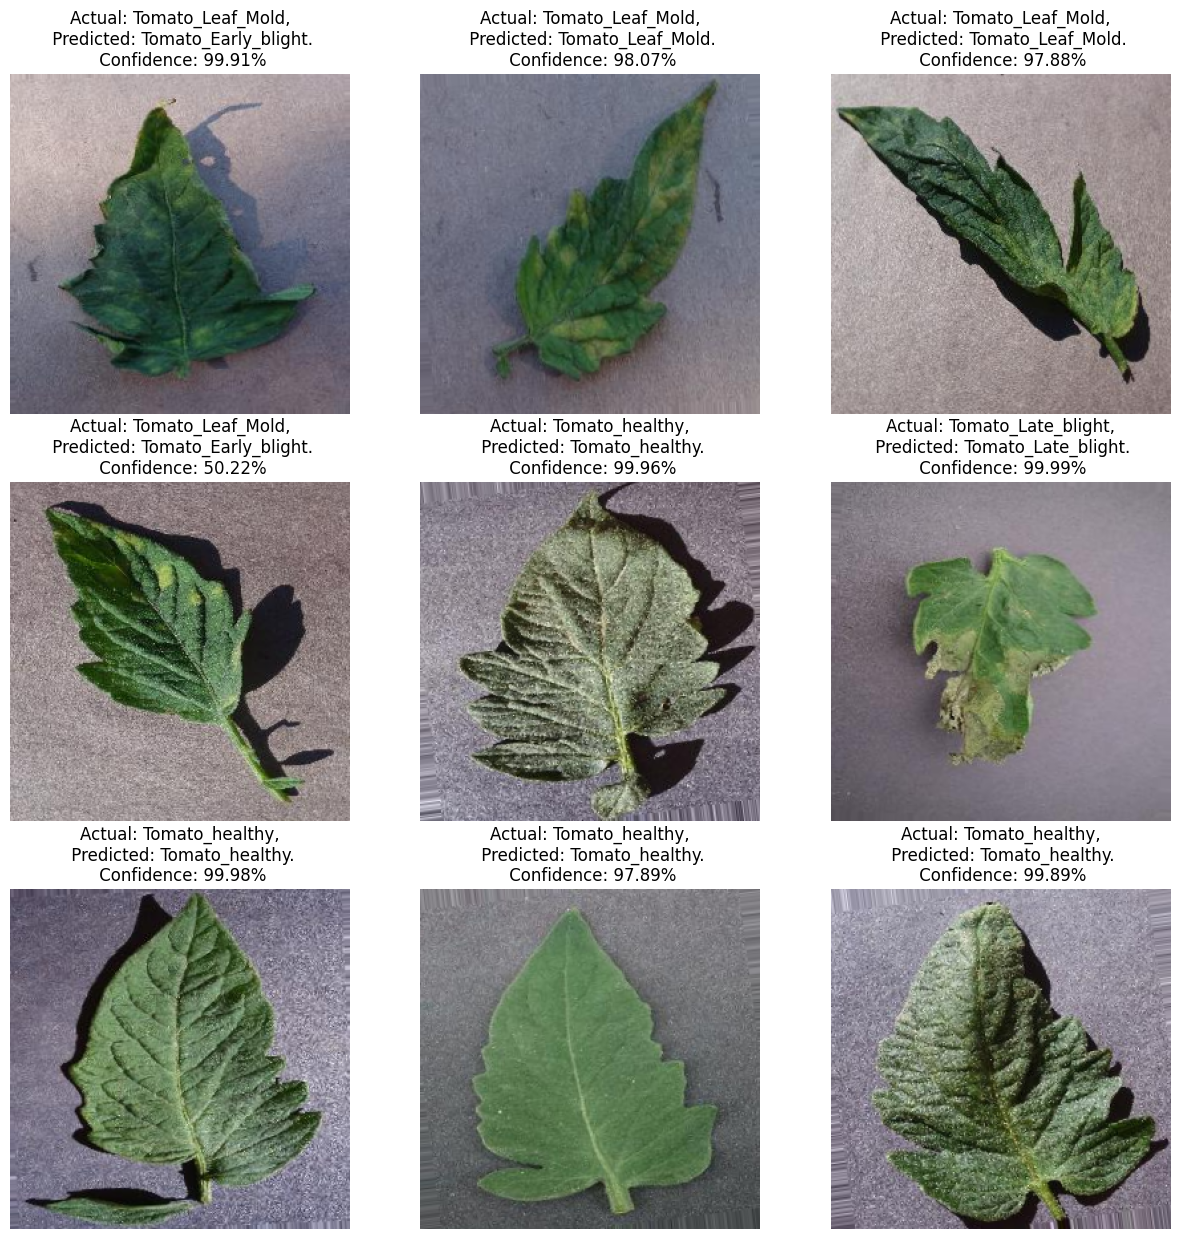

In [85]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [86]:
model.save("../tomato-imagegen.h5")

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0
